### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import sys
# adding utils to system path
sys.path.insert(0, '../utils')
from MlPipelineUtils import (
    get_features_data,
    get_dataset,
    get_X_y_data,
    evaluate_model_cm,
    evaluate_model_score
)

from sklearn.metrics import f1_score

### Evaluate best model

In [2]:
# set numpy seed to make random operations reproduceable
np.random.seed(0)

results_dir = pathlib.Path("../results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path(f"{results_dir}/0.data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../../1.format_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate with training data

In [3]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
training_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
4,Polylobed,10.0,1212.640449,21.314607,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,1.764085,-0.364659,-0.623983,0.087524,-0.678471,-1.047430,0.119700,0.254014,0.080685,-0.808582
5,MetaphaseAlignment,42.0,69.902174,104.782609,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-0.030402,-0.306105,0.471312,1.111647,-0.395580,0.265579,0.337486,-0.728758,0.519263,1.143726
6,Interphase,72.0,517.024390,159.317073,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-2.070584,-0.419038,-0.716160,2.525790,-0.300407,0.243762,0.270543,0.473745,-1.024547,-0.401801
8,Artefact,100.0,748.324675,220.935065,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-0.834010,-0.404291,0.839559,0.230029,-0.322646,-0.254167,-0.602655,-0.273222,-0.722049,0.554533
9,Artefact,108.0,795.484536,242.752577,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-1.406520,0.368818,0.568022,1.618059,-0.320691,0.527715,0.130431,-0.293846,-0.755968,0.025133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,SmallIrregular,70.0,645.173913,664.536232,LT0106_02,287_6,1,LT0106_02_287_6,LT0106_02/287/6/LT0106_02_287_6.tif,ENSG00000186143,...,0.481624,-0.066337,-0.298825,-1.073172,-0.263557,-0.922345,0.761749,0.721974,1.400016,-0.244034
4303,SmallIrregular,37.0,828.268657,338.328358,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,-0.010054,2.490791,0.112932,-0.448705,-0.573112,-1.219449,0.756078,-0.434373,-0.617329,2.989479
4304,SmallIrregular,45.0,62.742424,384.424242,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,0.828838,2.328690,2.365700,-1.219878,-0.377726,0.285707,0.072360,-0.101487,0.592109,-0.326425
4306,SmallIrregular,52.0,105.014085,429.056338,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,-0.890952,0.301522,0.345463,0.594489,0.737245,3.037339,-0.636915,0.061156,1.849867,-0.896322


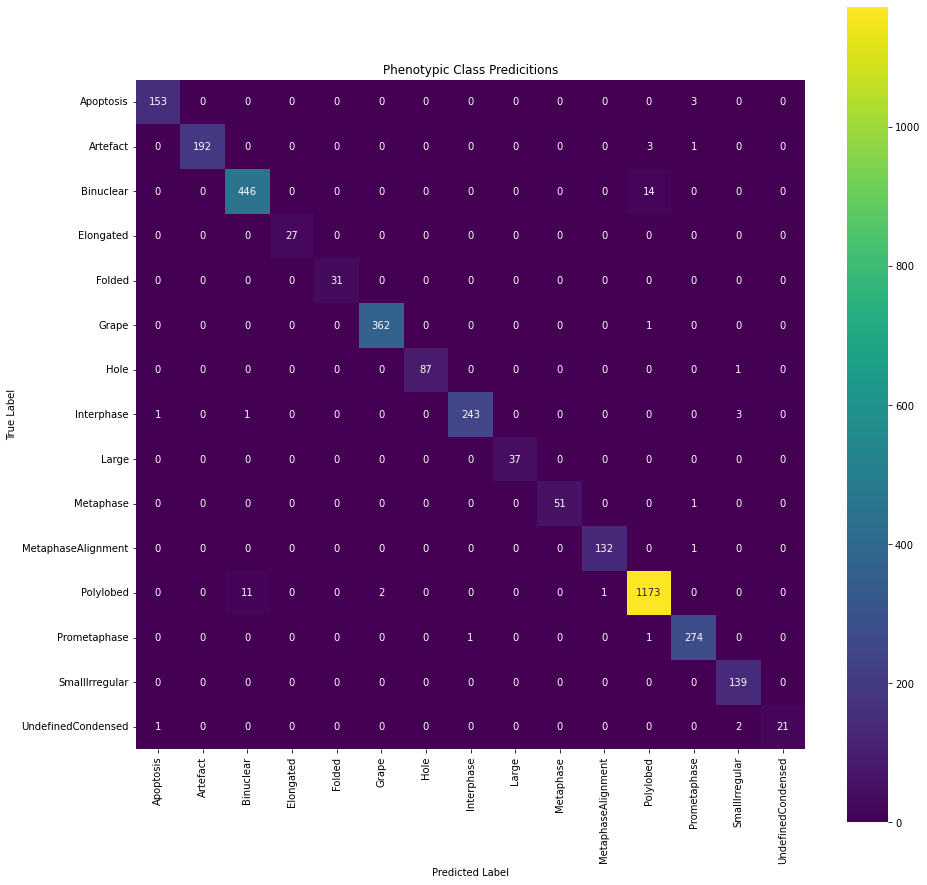

In [4]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

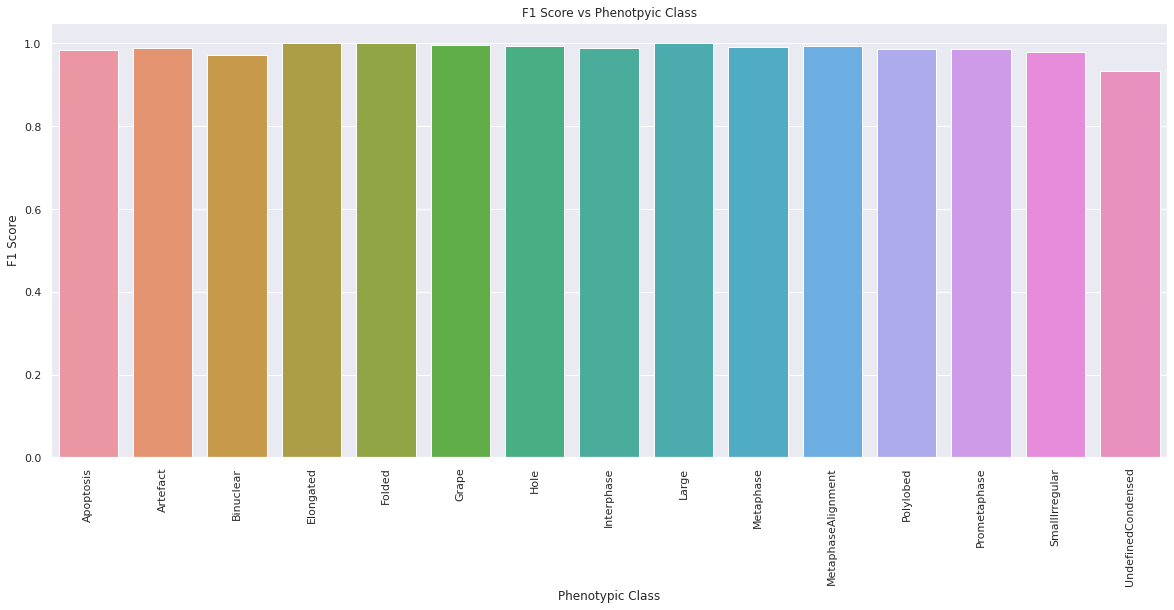

In [5]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [6]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
2542,Apoptosis,45.0,264.076923,231.230769,LT0109_38,381_87,1,LT0109_38_381_87,LT0109_38/381/87/LT0109_38_381_87.tif,COPB,...,0.747397,-0.303137,-0.441440,-0.558231,0.559000,2.418906,-0.536620,-0.060039,2.196802,-1.746036
2636,Apoptosis,106.0,419.000000,597.937500,LT0089_01,175_93,1,LT0089_01_175_93,LT0089_01/175/93/LT0089_01_175_93.tif,ENSG00000159763,...,0.394264,-0.389874,-0.183874,0.727683,-0.044377,-1.151310,0.289207,0.378687,0.896932,-1.444912
2637,Apoptosis,106.0,404.193548,598.161290,LT0089_01,175_93,1,LT0089_01_175_93,LT0089_01/175/93/LT0089_01_175_93.tif,ENSG00000159763,...,0.704804,-0.400241,-0.027618,0.955689,-0.165457,-1.231569,0.360471,0.534833,0.882122,-1.371561
2712,Apoptosis,34.0,716.863636,232.443182,LT0089_01,175_60,1,LT0089_01_175_60,LT0089_01/175/60/LT0089_01_175_60.tif,ENSG00000159763,...,1.174191,0.389117,0.551532,-0.899469,0.354533,1.228106,-1.004360,-1.001267,0.346599,-0.136300
2964,Apoptosis,145.0,726.048780,698.609756,LT0048_14,335_29,1,LT0048_14_335_29,LT0048_14/335/29/LT0048_14_335_29.tif,PLK1,...,0.569967,-0.616215,-0.702953,0.140410,0.007790,1.131292,-0.150318,-0.626151,1.383265,-1.793438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,SmallIrregular,170.0,1082.461538,553.169231,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.686351,0.323989,0.992241,-1.107960,-0.143038,-0.850287,-3.561455,0.478179,-0.354417,1.720881
701,UndefinedCondensed,47.0,1182.202703,109.581081,LT0101_01,277_79,1,LT0101_01_277_79,LT0101_01/277/79/LT0101_01_277_79.tif,failed_QC,...,0.275500,0.067556,0.724037,-0.283421,-0.288346,-0.134525,-0.028859,0.065001,1.887147,-1.169897
3174,UndefinedCondensed,75.0,694.145455,270.090909,LT0041_32,132_74,1,LT0041_32_132_74,LT0041_32/132/74/LT0041_32_132_74.tif,TRPV1,...,0.335572,0.152123,-0.596092,-0.183711,0.108508,1.344167,0.562621,0.056856,0.966724,0.466382
2059,UndefinedCondensed,68.0,899.866667,461.683333,LT0027_44,292_65,1,LT0027_44_292_65,LT0027_44/292/65/LT0027_44_292_65.tif,CDK4,...,0.825360,1.854059,-0.268961,-0.750176,-0.248810,-0.667705,0.825891,0.492001,1.212143,0.265127


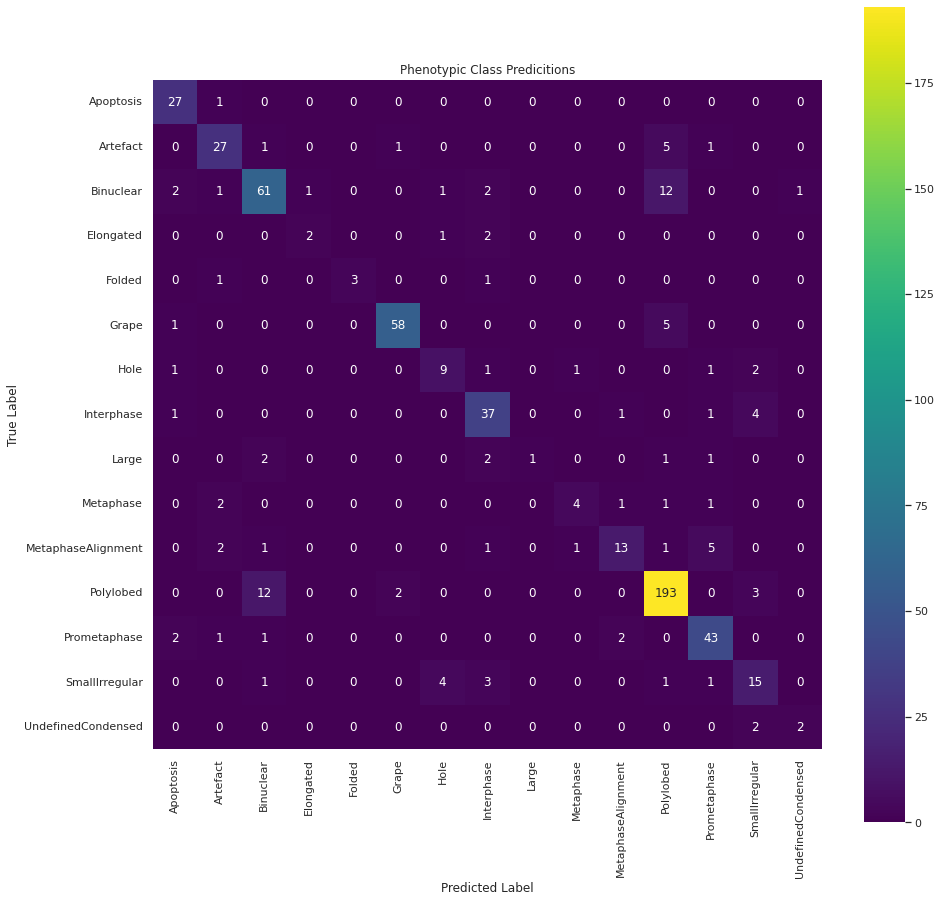

In [7]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

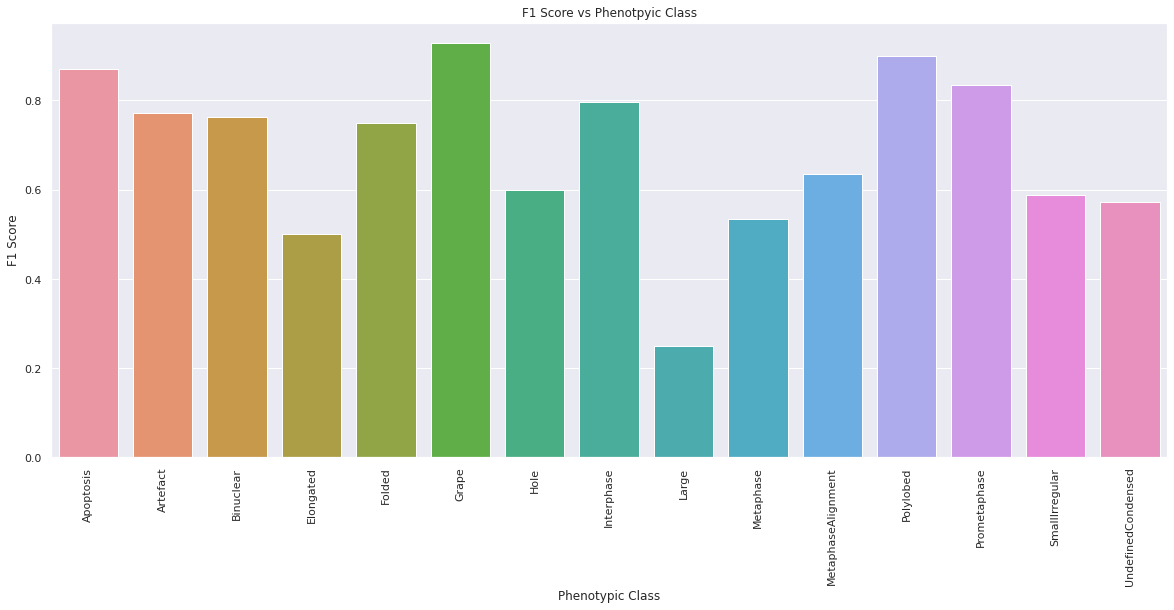

In [8]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [9]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
544,Large,46.0,673.963504,421.518248,LT0042_10,144_36,1,LT0042_10_144_36,LT0042_10/144/36/LT0042_10_144_36.tif,POLG,...,-0.869680,-0.819131,-0.065895,-0.584129,0.440676,1.731456,-0.300726,0.637247,-1.317758,-0.620867
545,Polylobed,47.0,239.978723,429.074468,LT0042_10,144_36,1,LT0042_10_144_36,LT0042_10/144/36/LT0042_10_144_36.tif,POLG,...,2.301987,-0.809295,-0.077291,-0.640948,1.342124,-0.829389,-0.514600,-0.681411,-0.130137,-0.984097
546,Polylobed,47.0,219.123288,439.972603,LT0042_10,144_36,1,LT0042_10_144_36,LT0042_10/144/36/LT0042_10_144_36.tif,POLG,...,0.648838,-0.948251,-0.230179,-0.920418,1.479645,-0.292760,0.309152,-0.593983,-0.226819,-1.323268
547,Polylobed,47.0,238.273973,456.630137,LT0042_10,144_36,1,LT0042_10_144_36,LT0042_10/144/36/LT0042_10_144_36.tif,POLG,...,-0.090531,-0.551376,2.460243,-1.067416,3.303222,-1.247294,1.483531,-0.815428,-1.067548,0.053700
548,Polylobed,47.0,213.785714,461.857143,LT0042_10,144_36,1,LT0042_10_144_36,LT0042_10/144/36/LT0042_10_144_36.tif,POLG,...,1.376728,-0.958535,-0.154087,-0.787587,2.873853,-0.237060,0.497598,-0.587101,1.101417,-0.382665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Folded,83.0,24.870370,692.805556,LT0138_03,127_35,1,LT0138_03_127_35,LT0138_03/127/35/LT0138_03_127_35.tif,ENSG00000116641,...,0.004918,-0.330484,-0.201508,-1.129264,0.376668,-0.047315,0.366433,0.584675,-0.209616,0.290683
4077,Folded,84.0,818.500000,691.933333,LT0138_03,127_35,1,LT0138_03_127_35,LT0138_03/127/35/LT0138_03_127_35.tif,ENSG00000116641,...,0.715451,-0.333479,0.692772,-0.598472,-0.312265,-0.150046,0.276773,-0.298540,-0.106108,-0.438396
4078,Polylobed,78.0,617.656250,699.125000,LT0138_03,127_35,1,LT0138_03_127_35,LT0138_03/127/35/LT0138_03_127_35.tif,ENSG00000116641,...,0.754502,-1.012552,-0.005334,-1.034427,0.010367,-0.101921,-0.433755,-0.010575,0.067495,-0.720715
4079,Folded,95.0,707.160377,802.254717,LT0138_03,127_35,1,LT0138_03_127_35,LT0138_03/127/35/LT0138_03_127_35.tif,ENSG00000116641,...,0.134387,-0.905355,-0.017685,-0.983794,-0.307310,-0.261301,-0.196357,0.948798,0.079491,-1.198162


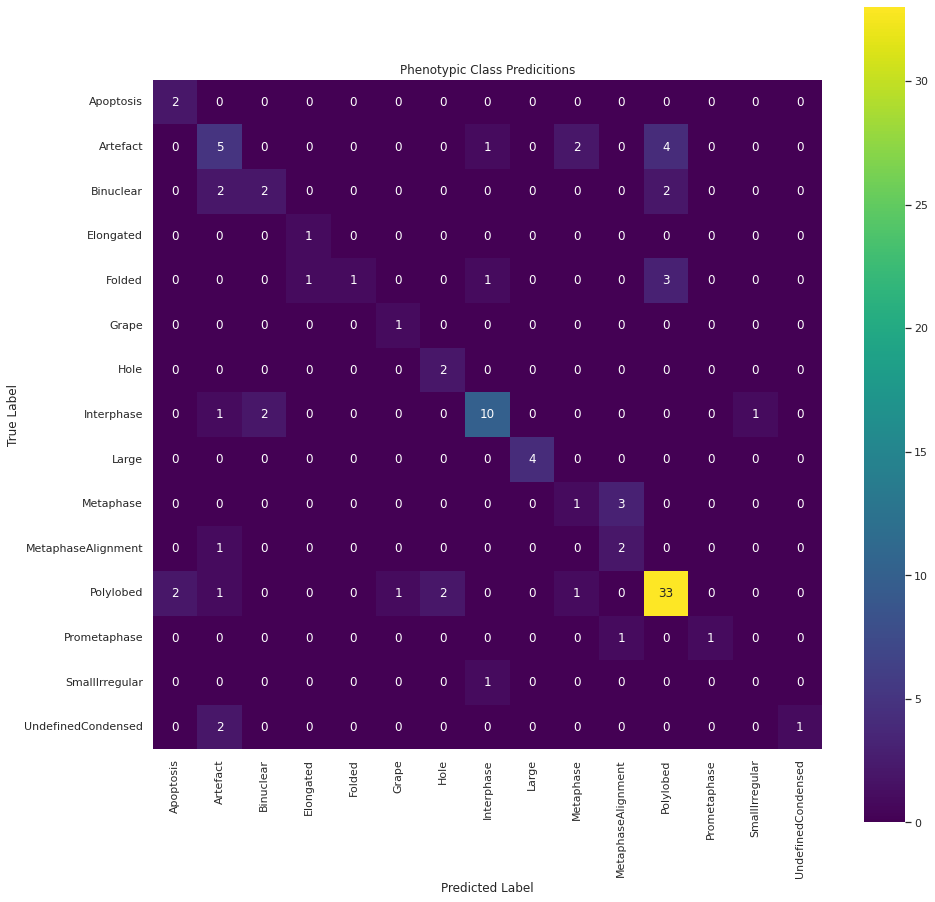

In [10]:
y_holdout, y_holdout_pred = evaluate_model_cm(log_reg_model, holdout_data)

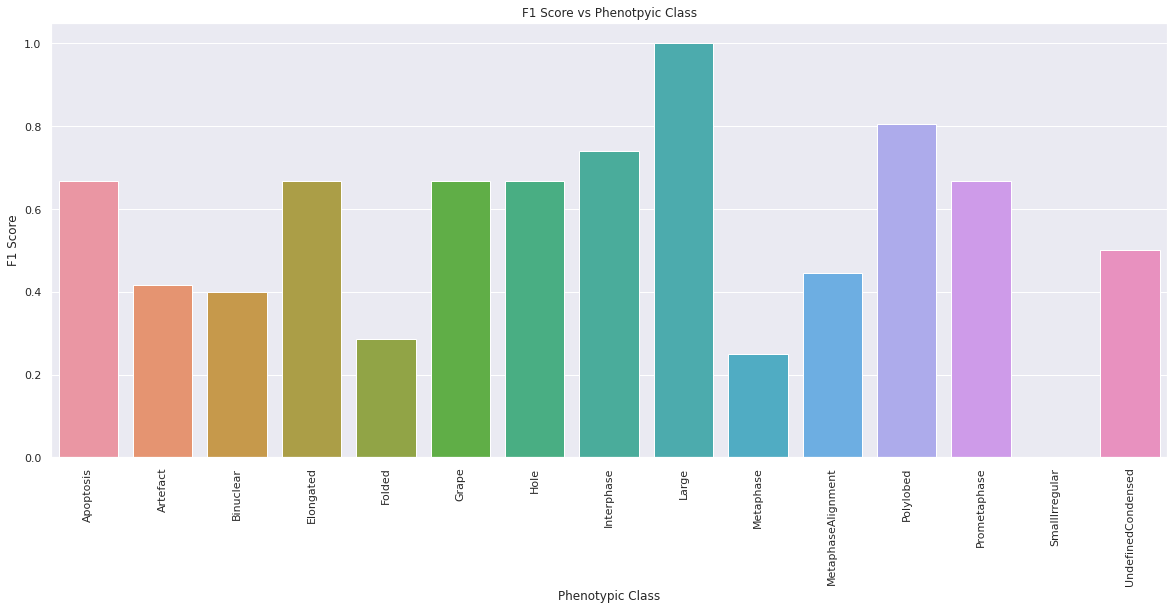

In [11]:
evaluate_model_score(log_reg_model, holdout_data)

### Save trained model predicitions

In [12]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/2.model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [13]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{results_dir}/1.shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

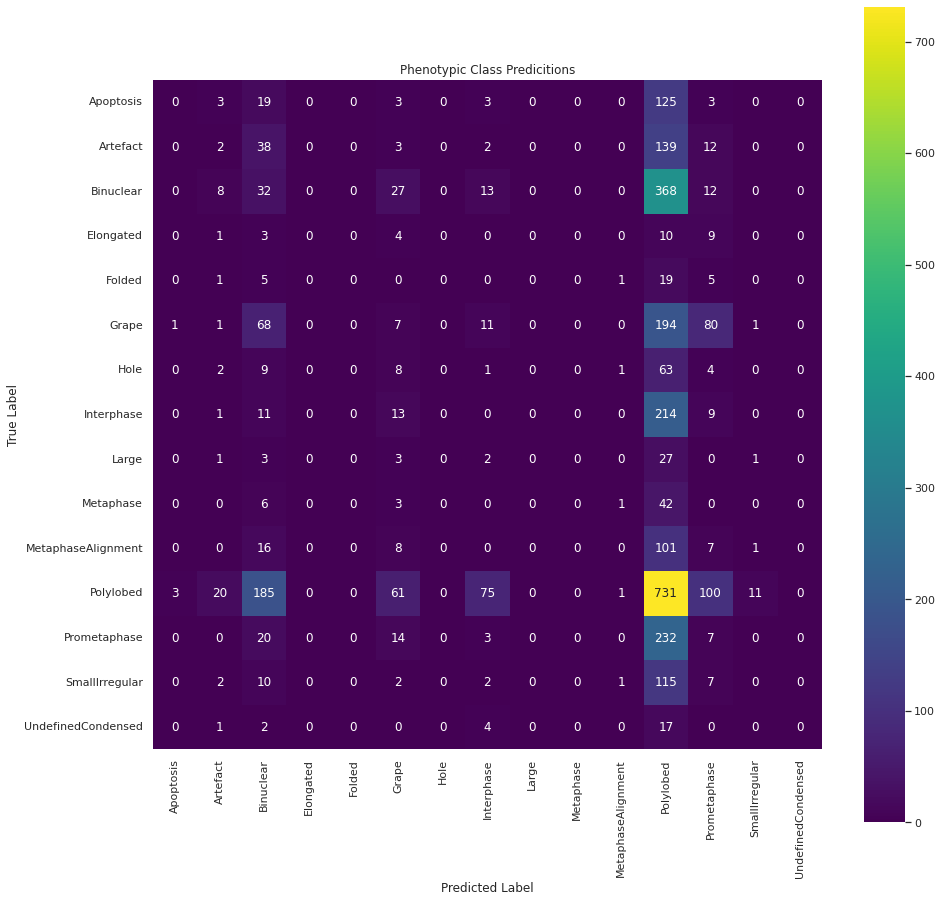

In [14]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

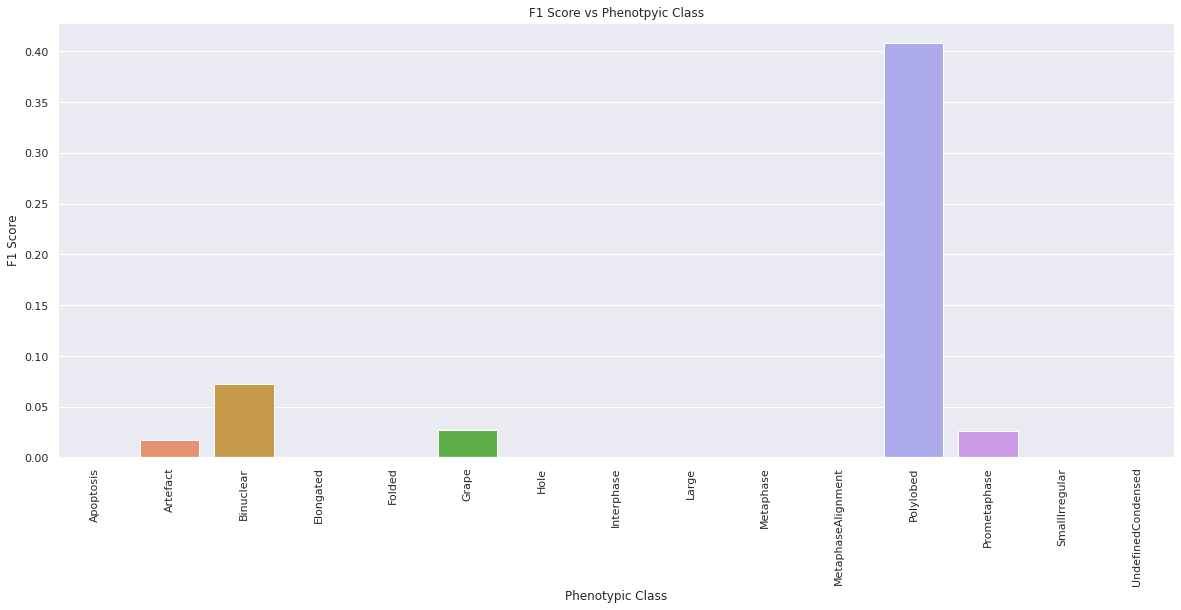

In [15]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

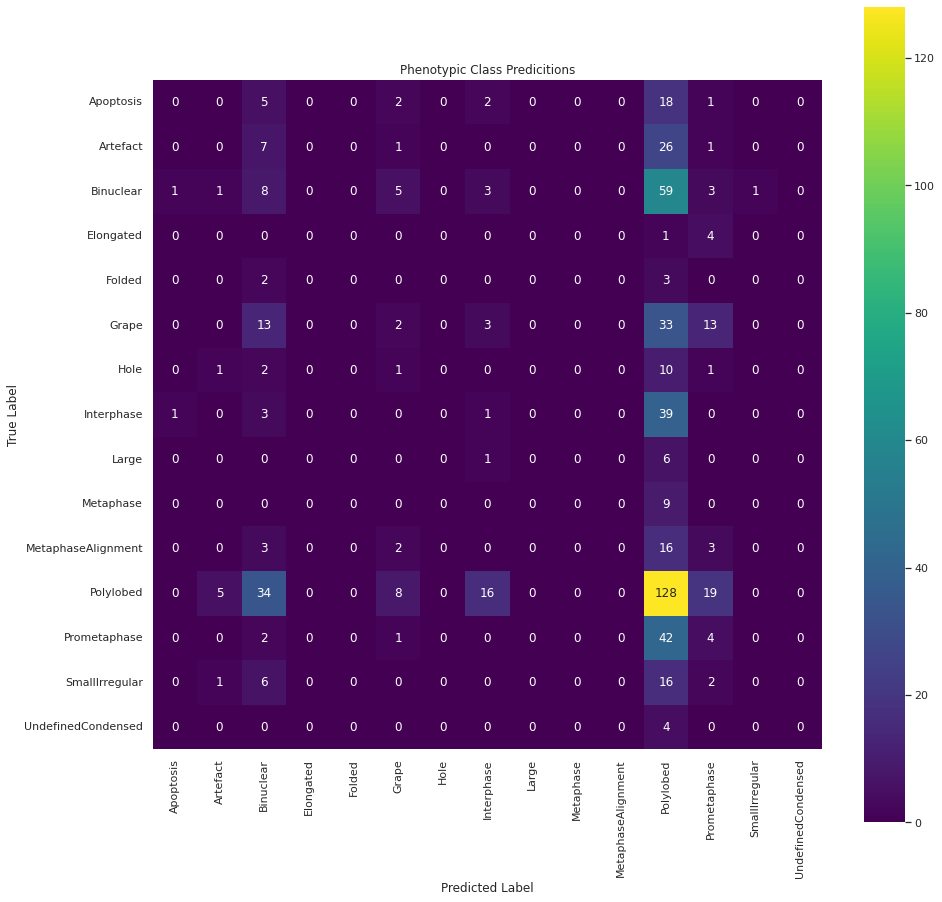

In [16]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

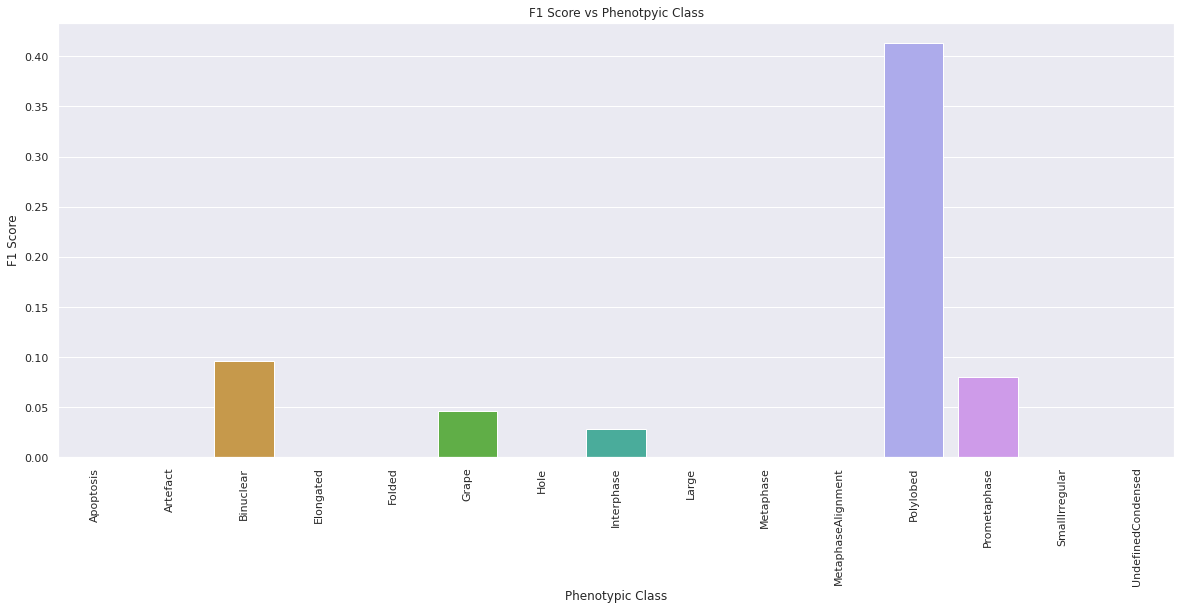

In [17]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Evaluate with holdout data

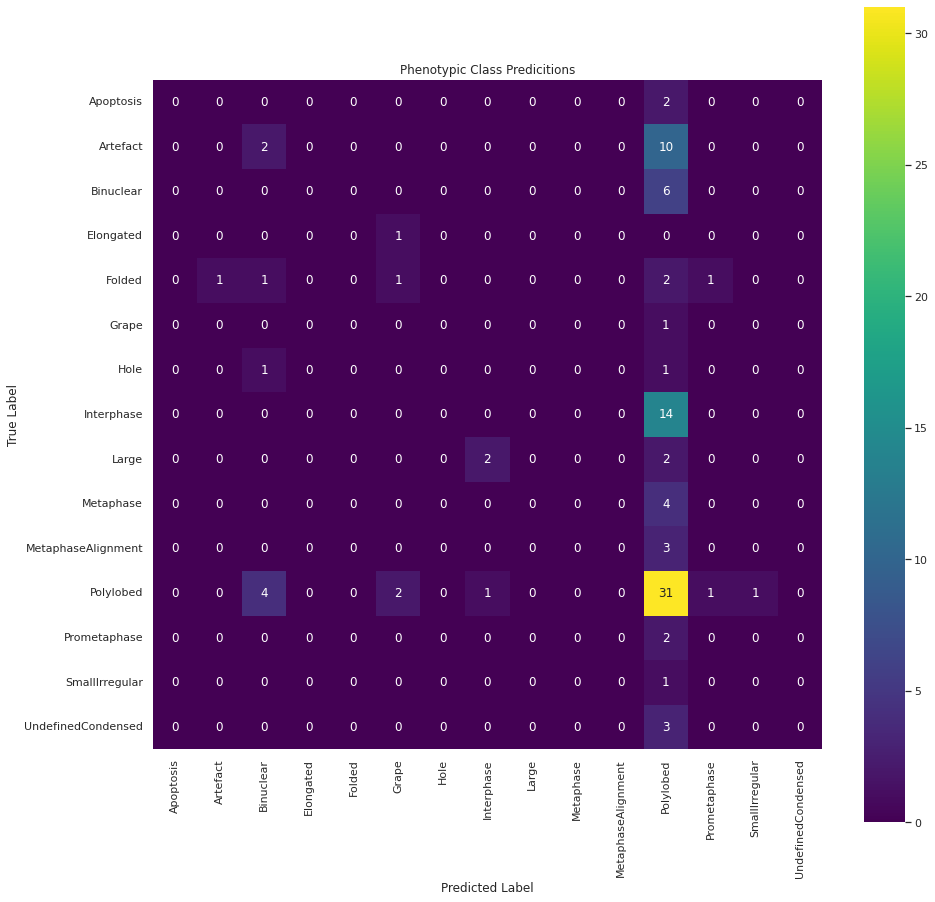

In [18]:
y_holdout, y_holdout_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, holdout_data)

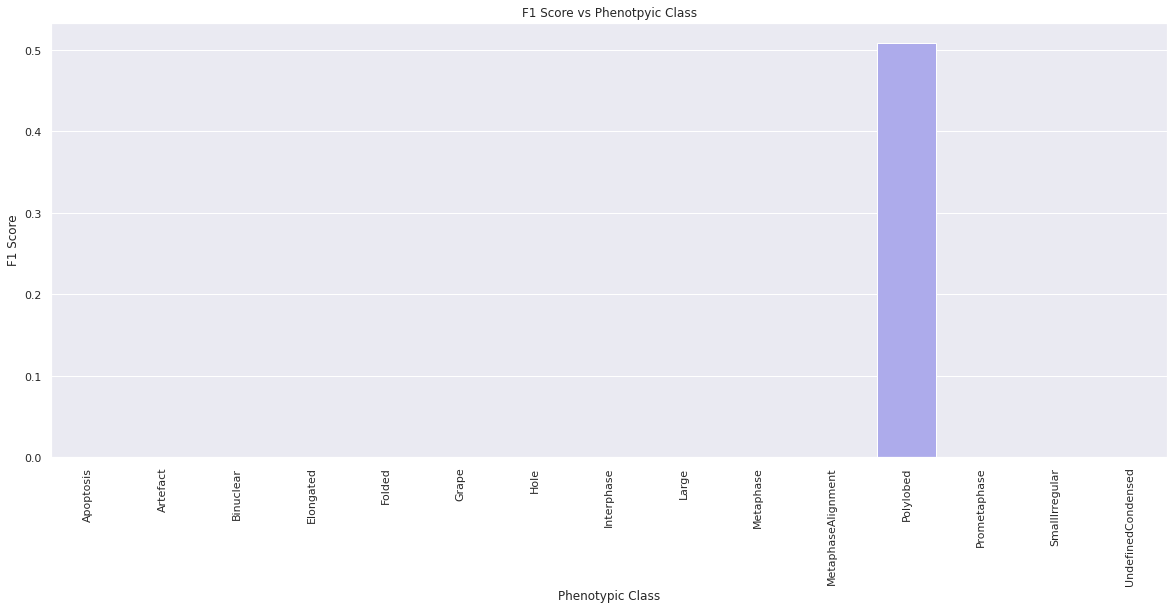

In [19]:
evaluate_model_score(shuffled_baseline_log_reg_model, holdout_data)

### Save trained model predicitions

In [20]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/2.shuffled_baseline_model_predictions.tsv", sep="\t")